In [2]:
import os
import pandas as pd

In [ ]:
os.chdir('/path/to...')

# All samples

In [6]:
df = pd.read_csv("kmer5_signature_snv_filtered_annotated4.tsv", sep="\t")

In [7]:
df

,kmer_5,alt_allele,Donor_ID,Tumor_Type
0,AT[C>G]CA,G,DO46416,Ovary-AdenoCA
1,AG[C>A]CA,A,DO46416,Ovary-AdenoCA
2,TA[T>A]AT,A,DO46416,Ovary-AdenoCA
3,TC[C>T]TG,T,DO46416,Ovary-AdenoCA
4,CG[C>G]AG,G,DO46416,Ovary-AdenoCA
...,...,...,...,...
41318711,AA[C>A]AA,A,DO51503,Panc-AdenoCA
41318712,TT[C>T]GG,T,DO51503,Panc-AdenoCA
41318713,CA[C>A]AA,A,DO51503,Panc-AdenoCA
41318714,AC[C>T]AA,T,DO51503,Panc-AdenoCA


In [8]:
mutation_counts = df.groupby(["Donor_ID", "kmer_5"], observed=True).size().unstack(fill_value=0)
# ~ 169 m cells

In [9]:
mutation_counts

kmer_5,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1000,7,3,6,3,4,1,1,6,1,1,...,0,0,1,1,0,2,1,2,0,4
DO1001,12,6,5,11,7,4,2,6,2,0,...,0,2,7,4,5,7,12,5,3,13
DO1002,20,4,6,5,11,9,0,4,3,2,...,0,3,4,0,6,6,6,1,2,7
DO1003,13,4,7,6,3,6,0,9,2,0,...,0,2,6,3,1,6,5,3,3,8
DO1004,34,11,19,24,33,13,3,20,2,1,...,0,11,9,7,10,12,5,7,6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,51,14,40,43,47,17,2,29,4,0,...,2,4,19,7,14,13,47,27,13,80
DO9732,76,21,24,47,39,28,0,22,5,3,...,1,5,9,6,14,15,17,27,12,48
DO9788,59,10,25,26,26,16,2,20,7,2,...,1,4,14,6,7,13,39,27,18,65


In [10]:
# unique Donor_ID tissue df
tumor_type_map = df.drop_duplicates("Donor_ID").set_index("Donor_ID")["Tumor_Type"]
tumor_type_map

Donor_ID
DO46416     Ovary-AdenoCA
DO36062     CNS-PiloAstro
DO45049         Liver-HCC
DO22145         CNS-Oligo
DO48578    Panc-Endocrine
                ...      
DO51079     Prost-AdenoCA
DO52704         Lymph-CLL
DO23552         Liver-HCC
DO720         Bladder-TCC
DO51503      Panc-AdenoCA
Name: Tumor_Type, Length: 2583, dtype: object

In [11]:
# add tissue to df
df_tissue = mutation_counts.join(tumor_type_map)
df_tissue

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1000,7,3,6,3,4,1,1,6,1,1,...,0,1,1,0,2,1,2,0,4,Breast-DCIS
DO1001,12,6,5,11,7,4,2,6,2,0,...,2,7,4,5,7,12,5,3,13,Breast-AdenoCa
DO1002,20,4,6,5,11,9,0,4,3,2,...,3,4,0,6,6,6,1,2,7,Breast-AdenoCa
DO1003,13,4,7,6,3,6,0,9,2,0,...,2,6,3,1,6,5,3,3,8,Breast-AdenoCa
DO1004,34,11,19,24,33,13,3,20,2,1,...,11,9,7,10,12,5,7,6,17,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,51,14,40,43,47,17,2,29,4,0,...,4,19,7,14,13,47,27,13,80,ColoRect-AdenoCA
DO9732,76,21,24,47,39,28,0,22,5,3,...,5,9,6,14,15,17,27,12,48,ColoRect-AdenoCA
DO9788,59,10,25,26,26,16,2,20,7,2,...,4,14,6,7,13,39,27,18,65,ColoRect-AdenoCA


In [12]:
df_tissue.dtypes

AA[C>A]AA      int64
AA[C>A]AC      int64
AA[C>A]AG      int64
AA[C>A]AT      int64
AA[C>A]CA      int64
               ...  
TT[T>G]TA      int64
TT[T>G]TC      int64
TT[T>G]TG      int64
TT[T>G]TT      int64
Tumor_Type    object
Length: 1537, dtype: object

In [13]:
counts = df_tissue['Tumor_Type'].value_counts()
df_filtered = df_tissue[df_tissue['Tumor_Type'].map(counts) >= 20]
df_filtered # 91 samples of 10 tumor types excluded

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,12,6,5,11,7,4,2,6,2,0,...,2,7,4,5,7,12,5,3,13,Breast-AdenoCa
DO1002,20,4,6,5,11,9,0,4,3,2,...,3,4,0,6,6,6,1,2,7,Breast-AdenoCa
DO1003,13,4,7,6,3,6,0,9,2,0,...,2,6,3,1,6,5,3,3,8,Breast-AdenoCa
DO1004,34,11,19,24,33,13,3,20,2,1,...,11,9,7,10,12,5,7,6,17,Breast-AdenoCa
DO1005,9,5,5,7,9,10,3,9,0,0,...,3,3,3,2,3,5,4,2,4,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,51,14,40,43,47,17,2,29,4,0,...,4,19,7,14,13,47,27,13,80,ColoRect-AdenoCA
DO9732,76,21,24,47,39,28,0,22,5,3,...,5,9,6,14,15,17,27,12,48,ColoRect-AdenoCA
DO9788,59,10,25,26,26,16,2,20,7,2,...,4,14,6,7,13,39,27,18,65,ColoRect-AdenoCA


In [14]:
counts = df_filtered['Tumor_Type'].value_counts()
counts # 27 tumor types

Tumor_Type
Liver-HCC           314
Panc-AdenoCA        232
Prost-AdenoCA       199
Breast-AdenoCa      195
Kidney-RCC          143
CNS-Medullo         141
Ovary-AdenoCA       110
Skin-Melanoma       107
Lymph-BNHL          105
Eso-AdenoCa          97
Lymph-CLL            90
CNS-PiloAstro        89
Panc-Endocrine       81
Stomach-AdenoCA      68
Head-SCC             56
ColoRect-AdenoCA     52
Thy-AdenoCA          48
Lung-SCC             47
Uterus-AdenoCA       44
Kidney-ChRCC         43
Bone-Osteosarc       41
CNS-GBM              39
Lung-AdenoCA         37
Biliary-AdenoCA      34
Bone-Leiomyo         34
Bladder-TCC          23
Myeloid-MPN          23
Name: count, dtype: int64

In [18]:
# save df to tsv file
# df_filtered.to_csv('to_dgd.tsv', sep='\t', index=False) # takes 23 min with 200g

In [19]:
df_filtered.to_parquet("to_dgd.parquet") # 3 min! (on GPU)

In [ ]:
# df_tissue.to_csv('count_df_1000.tsv.gz', sep='\t', index=False, compression='gzip') # > 15 min

In [ ]:
# df_sparse = df_tissue.astype(pd.SparseDtype("float64", 0))

In [15]:
# save df to tsv file
# df_tissue.to_csv('count_df_1000.tsv', sep='\t', index=False) # > 10 min and still running

In [16]:
# Load the compressed TSV file directly into pandas
# df = pd.read_csv('count_df_1000.tsv.gz', sep='\t') # > 15 min, it is faster to run the whole above panda pipeline instead

In [17]:
#palette = {'Double primary': 'black',  'Penile': 'lime',  'Vulva': 'aqua',  'Small intestine': 'violet',  'Mesothelioma': 'purple',  'Unknown':'black',  'CNS':'orange',  'Biliary':'red',  'NET': 'blue', 'Urinary tract': 'green', 'Bone/Soft tissue': '#00A99D', 'Breast': '#ED1E91',  'Lung': '#A084BD',  'Stomach': '#00AEEF',  'Colorectal': '#DAF1FC',  'Bile Duct': '#104A7F',  'Liver': '#CACDDD',  'Prostate': '#7F1717',  'Kidney': '#F8AEB2',  'Bone Marrow': '#744C27',  'Adrenal': '#CCAB8E',  'Thymus': '#CCAB8E',  'Skin': '#BAD543',  'Head and neck': '#97D1A9',  'Testis': '#BE1D2C',  'Pancreas': '#6E7BA3',  'Pleura': '#542C88',  'Thyroid': '#F4ED2F',  'Brain': '#D49DC6',  'Esophagus': '#007DB4',  'Bladder': '#F9D2DB',  'Eye': '#0D9344',  'Uterus': '#FBE3C7',  'Cervix': '#F7B666',  'Ovary': '#DA7D27'}

In [18]:
#palette = {'Myeloid_MPN': 'saddlebrown', 'Lymph-BNHL': '#3953A4', 'CNS-Medullo': 'orange', 'Biliary':'red', }

In [21]:
palette = {
    "Biliary-AdenoCA": "#00CD66",
    "Bladder-TCC": "#EEAD0E",
    "Bone-Epith": "#ADAC44",
    "Bone-Leiomyo": "green", # I added
    "Bone-Osteosarc": "#FFD700",
    "Breast-AdenoCa": "#CD6090",
    "CNS-GBM": "#3D3D3D",
    "CNS-Medullo": "#D8BFD8",
    "CNS-Oligo": "#787878",
    "CNS-PiloAstro": "#B0B0B0",
    "Cervix-SCC": "#79CDCD",
    "ColoRect-AdenoCA": "#191970",
    "Eso-AdenoCa": "#1E90FF",
    "Head-SCC": "#8B2323",
    "Kidney-ChRCC": "#B32F0B",
    "Kidney-RCC": "#FF4500",
    "Liver-HCC": "#006400",
    "Lung-AdenoCA": "pink",
    "Lung-SCC": "#FDF5E6",
    "Lymph-BNHL": "#698B22",
    "Lymph-CLL": "#F4A35D", # found the right one
    "Myeloid-AML": "#CD6600",
    "Myeloid-MPN": "#FFC100",
    "Ovary-AdenoCA": "#008B8B",
    "Panc-AdenoCA": "#7A378B",
    "Panc-Endocrine": "#E066FF",
    "Prost-AdenoCA": "#87CEFA",
    "Skin-Melanoma": "#000000",
    "SoftTissue-Leiomyo": "#FFEC8B",
    "SoftTissue-Liposarc": "#CDCB50",
    "Stomach-AdenoCA": "#BFEFFF",
    "Thy-AdenoCA": "#9370DB",
    "Uterus-AdenoCA": "#FF8C69"
}

In [22]:
colors = [palette[label] for label in counts.index]
len(colors)

27

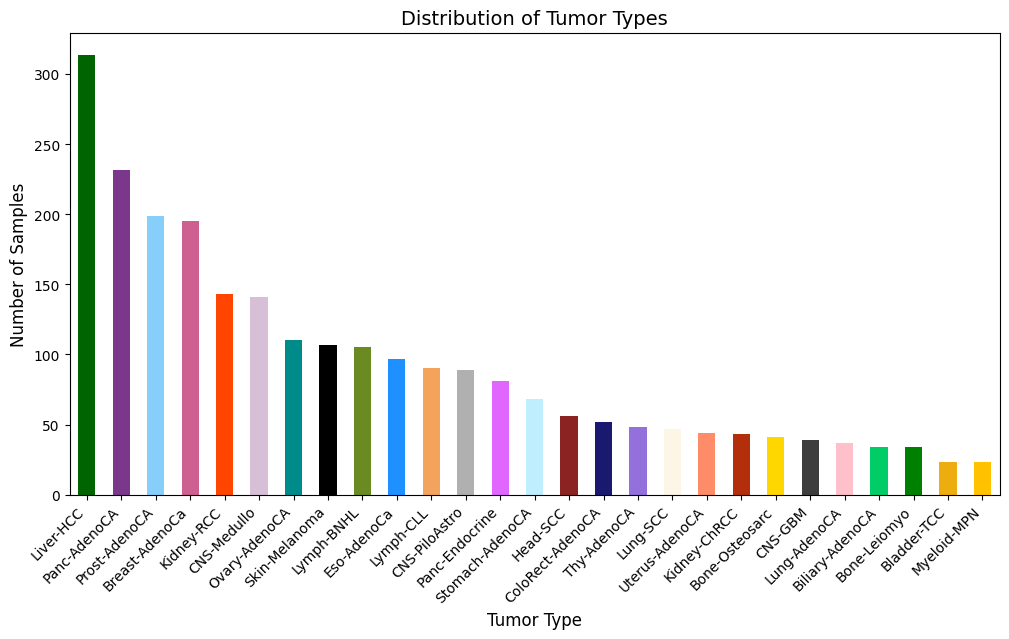

In [23]:
# Tissue distribution
import matplotlib.pyplot as plt

colors = [palette[label] for label in counts.index]

# Plot the bar chart
plt.figure(figsize=(12, 6))
counts.plot(kind="bar", color=colors)

# Add labels and title
plt.xlabel("Tumor Type", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.title("Distribution of Tumor Types", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.savefig(f"TumorTypeDistribution.pdf", bbox_inches='tight')

# Normalized counts PCA

In [3]:
df_filtered = pd.read_parquet("to_dgd.parquet")

In [4]:
df_filtered

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,12,6,5,11,7,4,2,6,2,0,...,2,7,4,5,7,12,5,3,13,Breast-AdenoCa
DO1002,20,4,6,5,11,9,0,4,3,2,...,3,4,0,6,6,6,1,2,7,Breast-AdenoCa
DO1003,13,4,7,6,3,6,0,9,2,0,...,2,6,3,1,6,5,3,3,8,Breast-AdenoCa
DO1004,34,11,19,24,33,13,3,20,2,1,...,11,9,7,10,12,5,7,6,17,Breast-AdenoCa
DO1005,9,5,5,7,9,10,3,9,0,0,...,3,3,3,2,3,5,4,2,4,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,51,14,40,43,47,17,2,29,4,0,...,4,19,7,14,13,47,27,13,80,ColoRect-AdenoCA
DO9732,76,21,24,47,39,28,0,22,5,3,...,5,9,6,14,15,17,27,12,48,ColoRect-AdenoCA
DO9788,59,10,25,26,26,16,2,20,7,2,...,4,14,6,7,13,39,27,18,65,ColoRect-AdenoCA


In [15]:
# mutation frequencies for each sample
df_toPCA = df_filtered.iloc[:, :-1].div(df_filtered.iloc[:, :-1].sum(axis=1), axis=0)
df_toPCA

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.002122,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,...,0.000000,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299
DO1002,0.003684,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,...,0.000000,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289
DO1003,0.002779,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,...,0.000000,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710
DO1004,0.003077,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,...,0.000000,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538
DO1005,0.001401,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,...,0.000000,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,0.002921,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,...,0.000115,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581
DO9732,0.004553,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,...,0.000060,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876
DO9788,0.004425,0.000750,0.001875,0.001950,0.001950,0.001200,0.000150,0.001500,0.000525,0.000150,...,0.000075,0.000300,0.001050,0.000450,0.000525,0.000975,0.002925,0.002025,0.001350,0.004875


In [16]:
# add tissue to df
df_tissue = df_toPCA.join(tumor_type_map)
df_tissue

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.002122,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,...,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299,Breast-AdenoCa
DO1002,0.003684,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,...,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289,Breast-AdenoCa
DO1003,0.002779,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,...,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710,Breast-AdenoCa
DO1004,0.003077,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,...,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538,Breast-AdenoCa
DO1005,0.001401,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,...,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,0.002921,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,...,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581,ColoRect-AdenoCA
DO9732,0.004553,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,...,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876,ColoRect-AdenoCA
DO9788,0.004425,0.000750,0.001875,0.001950,0.001950,0.001200,0.000150,0.001500,0.000525,0.000150,...,0.000300,0.001050,0.000450,0.000525,0.000975,0.002925,0.002025,0.001350,0.004875,ColoRect-AdenoCA


In [28]:
# save for performance measure
df_tissue.to_parquet('normalized.parquet')

In [4]:
df_tissue = pd.read_parquet('normalized.parquet')
df_tissue

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.002122,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,...,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299,Breast-AdenoCa
DO1002,0.003684,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,...,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289,Breast-AdenoCa
DO1003,0.002779,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,...,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710,Breast-AdenoCa
DO1004,0.003077,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,...,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538,Breast-AdenoCa
DO1005,0.001401,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,...,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,0.002921,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,...,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581,ColoRect-AdenoCA
DO9732,0.004553,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,...,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876,ColoRect-AdenoCA
DO9788,0.004425,0.000750,0.001875,0.001950,0.001950,0.001200,0.000150,0.001500,0.000525,0.000150,...,0.000300,0.001050,0.000450,0.000525,0.000975,0.002925,0.002025,0.001350,0.004875,ColoRect-AdenoCA


In [5]:
from sklearn.model_selection import train_test_split
# set random seeds
seed = 1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [6]:
train_data, val_test_data = train_test_split(df_tissue, test_size=0.3, random_state=seed, stratify=df_tissue['Tumor_Type'])

In [7]:
validation_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=seed, stratify=val_test_data['Tumor_Type'])

In [8]:
# merge and sort dfs
concat = pd.concat([train_data, validation_data], axis=0)
concat

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO50420,0.004566,0.001740,0.001522,0.002174,0.003044,0.000870,0.000435,0.002174,0.000435,0.000000,...,0.000435,0.000435,0.000000,0.000435,0.000435,0.000652,0.000870,0.000652,0.002609,Prost-AdenoCA
DO52701,0.002513,0.000942,0.001256,0.001884,0.001570,0.001570,0.000000,0.001570,0.000000,0.000000,...,0.001256,0.000628,0.000000,0.000314,0.001570,0.003141,0.002827,0.000628,0.008480,Lymph-CLL
DO51500,0.004192,0.000729,0.000911,0.001640,0.003098,0.001276,0.000182,0.000182,0.000182,0.000000,...,0.000547,0.000364,0.000000,0.000729,0.000182,0.001640,0.001276,0.000364,0.002551,Panc-AdenoCA
DO10829,0.002342,0.002342,0.002342,0.000781,0.003903,0.000781,0.000000,0.001561,0.000000,0.000781,...,0.000000,0.000000,0.000000,0.000781,0.000781,0.000000,0.000781,0.000000,0.002342,Prost-AdenoCA
DO51069,0.003946,0.001184,0.001579,0.001973,0.001579,0.001973,0.000000,0.000395,0.000000,0.000000,...,0.000789,0.000395,0.000000,0.000000,0.000789,0.000789,0.000395,0.000000,0.002368,Prost-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46328,0.002586,0.000185,0.001293,0.001293,0.002402,0.000924,0.000369,0.001293,0.000000,0.000000,...,0.000554,0.000554,0.000369,0.000554,0.000554,0.000739,0.000924,0.000924,0.003141,Ovary-AdenoCA
DO23028,0.003459,0.001456,0.002367,0.001729,0.002367,0.001274,0.000273,0.002913,0.000364,0.000546,...,0.000546,0.000273,0.000273,0.000364,0.000182,0.000637,0.000637,0.000637,0.001274,Liver-HCC
DO48925,0.003044,0.000000,0.000000,0.003044,0.001522,0.001522,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001522,0.000000,0.000000,0.001522,0.000000,0.000000,0.000000,0.001522,CNS-Medullo


In [9]:
tumor_type = concat.iloc[:, -1:]
tumor_type

,Tumor_Type
Donor_ID,
DO50420,Prost-AdenoCA
DO52701,Lymph-CLL
DO51500,Panc-AdenoCA
DO10829,Prost-AdenoCA
DO51069,Prost-AdenoCA
...,...
DO46328,Ovary-AdenoCA
DO23028,Liver-HCC
DO48925,CNS-Medullo


In [10]:
df_toPCA = concat.iloc[:, :-1]
df_toPCA

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO50420,0.004566,0.001740,0.001522,0.002174,0.003044,0.000870,0.000435,0.002174,0.000435,0.000000,...,0.000000,0.000435,0.000435,0.000000,0.000435,0.000435,0.000652,0.000870,0.000652,0.002609
DO52701,0.002513,0.000942,0.001256,0.001884,0.001570,0.001570,0.000000,0.001570,0.000000,0.000000,...,0.000000,0.001256,0.000628,0.000000,0.000314,0.001570,0.003141,0.002827,0.000628,0.008480
DO51500,0.004192,0.000729,0.000911,0.001640,0.003098,0.001276,0.000182,0.000182,0.000182,0.000000,...,0.000000,0.000547,0.000364,0.000000,0.000729,0.000182,0.001640,0.001276,0.000364,0.002551
DO10829,0.002342,0.002342,0.002342,0.000781,0.003903,0.000781,0.000000,0.001561,0.000000,0.000781,...,0.000781,0.000000,0.000000,0.000000,0.000781,0.000781,0.000000,0.000781,0.000000,0.002342
DO51069,0.003946,0.001184,0.001579,0.001973,0.001579,0.001973,0.000000,0.000395,0.000000,0.000000,...,0.000395,0.000789,0.000395,0.000000,0.000000,0.000789,0.000789,0.000395,0.000000,0.002368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46328,0.002586,0.000185,0.001293,0.001293,0.002402,0.000924,0.000369,0.001293,0.000000,0.000000,...,0.000000,0.000554,0.000554,0.000369,0.000554,0.000554,0.000739,0.000924,0.000924,0.003141
DO23028,0.003459,0.001456,0.002367,0.001729,0.002367,0.001274,0.000273,0.002913,0.000364,0.000546,...,0.000000,0.000546,0.000273,0.000273,0.000364,0.000182,0.000637,0.000637,0.000637,0.001274
DO48925,0.003044,0.000000,0.000000,0.003044,0.001522,0.001522,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001522,0.000000,0.000000,0.001522,0.000000,0.000000,0.000000,0.001522


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_toPCA)

In [12]:
df_scaled

array([[ 0.6232181 ,  1.04234071,  0.08317661, ..., -0.04308639,
        -0.10463258, -0.06192745],
       [-0.26367347,  0.04953228, -0.09785053, ...,  1.11049935,
        -0.12356489,  1.74062302],
       [ 0.46149274, -0.21596696, -0.33285308, ...,  0.19624493,
        -0.3300329 , -0.07966777],
       ...,
       [-0.03410563, -1.12372492, -0.95349682, ..., -0.55580905,
        -0.61548411, -0.39574474],
       [-0.60531084, -0.10832646, -0.58323618, ...,  2.38182423,
         2.29368971,  3.03165784],
       [-0.26162486,  2.01086785, -0.09623509, ..., -0.55580905,
        -0.61548411,  0.10306947]])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [14]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.0524245  0.04156241 0.03044935 0.02662643 0.0175658  0.01324644
 0.00916    0.00848463 0.0081461  0.00800981 0.00789659 0.00747451
 0.00726919 0.00712998 0.00701969 0.00683804 0.00650902 0.00644866
 0.00623538 0.00614309]


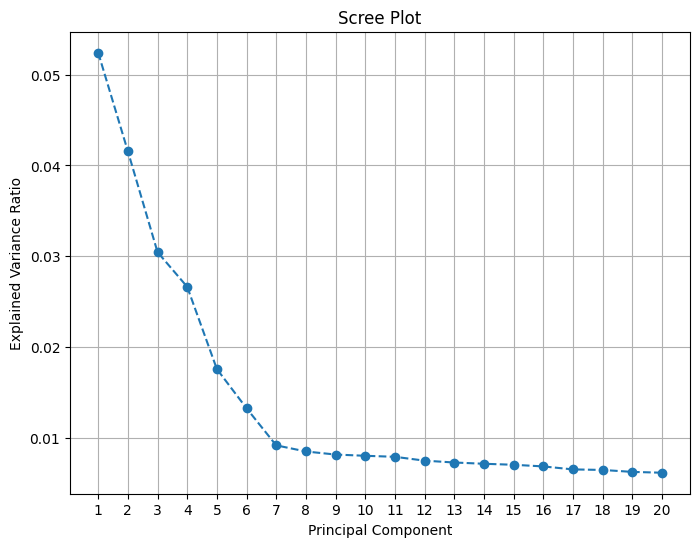

In [36]:
# Create a scree plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(range(1, len(explained_variance) + 1))

plt.savefig(f"scree_norm.pdf", bbox_inches='tight')

plt.show()

In [16]:
# make df and combine by index
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])

In [17]:
pca_result_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.315494,-1.598231,-4.062877,5.892679,-1.670544,3.202211,-1.336093,0.196176,0.345882,0.346932,0.645027,0.260441,-0.336452,-0.547194,-0.314716,-0.838761,0.360038,0.286202,-0.157434,1.176128
1,-11.605450,-6.948828,2.838409,-1.919909,1.285441,2.572563,-6.213423,11.711439,-7.615623,2.744405,5.250757,0.760029,1.057089,-2.229599,2.649278,-4.196381,-2.094770,1.633091,0.725266,1.297399
2,1.157731,-4.960997,-2.701873,4.108579,-1.672431,-0.611581,-0.484341,-0.144688,0.199169,-0.483155,-0.935456,0.496041,-0.570805,-1.031416,0.321915,0.029452,-0.308684,-0.724261,0.088966,0.126759
3,-0.494567,-0.772361,-3.718437,3.969548,-0.068170,-0.551102,-1.061082,0.976536,0.280943,-1.046728,-1.666069,-0.054607,0.235959,0.204593,-1.543850,-0.486903,1.706779,0.036184,-0.061731,2.298054
4,-0.017128,0.201249,-2.806225,2.646256,-1.220889,1.018452,-0.351908,0.858064,-0.281827,-0.254431,-0.955162,0.317345,-0.792439,1.005446,-0.973979,0.317499,1.387608,0.400892,1.313569,1.027024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.023178,4.601423,6.372588,-0.617382,-3.320477,0.243628,-1.270358,2.585674,-1.183928,0.601708,1.894703,0.486944,-0.584206,0.555440,0.005043,1.218931,1.029015,1.563743,-0.343647,0.261209
2114,-8.709351,7.086349,-5.760167,-2.972088,5.751293,-5.183043,2.349016,-2.128918,0.716788,-0.408706,-1.325974,0.096200,-0.342684,0.704250,-0.067190,0.451840,0.068052,0.908506,0.998361,1.167586
2115,-1.297526,3.106701,-0.319857,-1.097539,0.542355,3.228133,0.931731,1.632390,-0.929652,-0.495554,-0.617041,-2.098545,-0.601703,1.098015,0.313402,-0.372267,0.299698,-1.787355,0.493149,-0.379766
2116,-18.190329,-17.629836,14.895965,-3.368023,-1.287522,12.959700,-5.795198,13.383400,-9.775619,3.529386,7.495588,1.355483,0.650689,-3.627924,2.219777,-5.097717,-1.712285,2.367613,0.980125,1.860841


In [18]:
# must make the series a df so I can preserve the order of "Tumor_Type", for some reason
#tumor_type_df = tumor_type_map.to_frame(name="Tumor_Type").sort_index()
#tumor_type_df

In [19]:
pca_result_df["Tumor_Type"] = concat["Tumor_Type"].values
pca_result_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Tumor_Type
0,0.315494,-1.598231,-4.062877,5.892679,-1.670544,3.202211,-1.336093,0.196176,0.345882,0.346932,...,0.260441,-0.336452,-0.547194,-0.314716,-0.838761,0.360038,0.286202,-0.157434,1.176128,Prost-AdenoCA
1,-11.605450,-6.948828,2.838409,-1.919909,1.285441,2.572563,-6.213423,11.711439,-7.615623,2.744405,...,0.760029,1.057089,-2.229599,2.649278,-4.196381,-2.094770,1.633091,0.725266,1.297399,Lymph-CLL
2,1.157731,-4.960997,-2.701873,4.108579,-1.672431,-0.611581,-0.484341,-0.144688,0.199169,-0.483155,...,0.496041,-0.570805,-1.031416,0.321915,0.029452,-0.308684,-0.724261,0.088966,0.126759,Panc-AdenoCA
3,-0.494567,-0.772361,-3.718437,3.969548,-0.068170,-0.551102,-1.061082,0.976536,0.280943,-1.046728,...,-0.054607,0.235959,0.204593,-1.543850,-0.486903,1.706779,0.036184,-0.061731,2.298054,Prost-AdenoCA
4,-0.017128,0.201249,-2.806225,2.646256,-1.220889,1.018452,-0.351908,0.858064,-0.281827,-0.254431,...,0.317345,-0.792439,1.005446,-0.973979,0.317499,1.387608,0.400892,1.313569,1.027024,Prost-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.023178,4.601423,6.372588,-0.617382,-3.320477,0.243628,-1.270358,2.585674,-1.183928,0.601708,...,0.486944,-0.584206,0.555440,0.005043,1.218931,1.029015,1.563743,-0.343647,0.261209,Ovary-AdenoCA
2114,-8.709351,7.086349,-5.760167,-2.972088,5.751293,-5.183043,2.349016,-2.128918,0.716788,-0.408706,...,0.096200,-0.342684,0.704250,-0.067190,0.451840,0.068052,0.908506,0.998361,1.167586,Liver-HCC
2115,-1.297526,3.106701,-0.319857,-1.097539,0.542355,3.228133,0.931731,1.632390,-0.929652,-0.495554,...,-2.098545,-0.601703,1.098015,0.313402,-0.372267,0.299698,-1.787355,0.493149,-0.379766,CNS-Medullo
2116,-18.190329,-17.629836,14.895965,-3.368023,-1.287522,12.959700,-5.795198,13.383400,-9.775619,3.529386,...,1.355483,0.650689,-3.627924,2.219777,-5.097717,-1.712285,2.367613,0.980125,1.860841,Lymph-BNHL


In [20]:
# save for performance measure
#pca_result_df.to_csv('PCs_normalized.tsv', sep='\t', index=False), i also need to save the model then

In [21]:
test_data

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,0.004843,0.001038,0.001384,0.001730,0.002767,0.002075,0.000000,0.001730,0.000000,0.000000,...,0.001038,0.000000,0.000346,0.000692,0.000000,0.000000,0.000692,0.000000,0.002767,Prost-AdenoCA
DO51496,0.002721,0.000583,0.001555,0.002138,0.002138,0.000972,0.000000,0.001361,0.000194,0.000194,...,0.000389,0.000389,0.000000,0.000194,0.000194,0.000389,0.000389,0.000389,0.001749,Panc-AdenoCA
DO15046,0.002660,0.001248,0.002135,0.002463,0.001609,0.001084,0.000230,0.001347,0.000230,0.000164,...,0.000263,0.000328,0.000460,0.000230,0.000263,0.000427,0.000657,0.000361,0.002102,Head-SCC
DO6558,0.004627,0.001322,0.000000,0.001983,0.001322,0.000000,0.000661,0.000000,0.001322,0.000000,...,0.000000,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000,0.000661,0.001983,Lymph-CLL
DO50410,0.002769,0.000577,0.002192,0.001558,0.002192,0.001269,0.000058,0.001269,0.000231,0.000058,...,0.000404,0.000923,0.000173,0.000462,0.000404,0.009866,0.005308,0.004500,0.008250,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,0.003161,0.001355,0.001580,0.001430,0.002333,0.001129,0.000301,0.002408,0.000301,0.000151,...,0.000151,0.000753,0.000452,0.000978,0.000452,0.000527,0.000151,0.000602,0.001355,Ovary-AdenoCA
DO51514,0.001811,0.001114,0.001532,0.001393,0.000975,0.001393,0.000000,0.000975,0.000139,0.000000,...,0.000000,0.000418,0.000000,0.001114,0.000557,0.001253,0.000836,0.001114,0.003482,Panc-AdenoCA
DO51144,0.004851,0.000606,0.001819,0.000910,0.003032,0.001213,0.000000,0.002426,0.000000,0.000000,...,0.000000,0.000606,0.000000,0.000000,0.000000,0.000606,0.000910,0.000303,0.003032,Prost-AdenoCA


In [22]:
test_df_toPCA = test_data.iloc[:, :-1]
test_df_toPCA

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,0.004843,0.001038,0.001384,0.001730,0.002767,0.002075,0.000000,0.001730,0.000000,0.000000,...,0.000000,0.001038,0.000000,0.000346,0.000692,0.000000,0.000000,0.000692,0.000000,0.002767
DO51496,0.002721,0.000583,0.001555,0.002138,0.002138,0.000972,0.000000,0.001361,0.000194,0.000194,...,0.000000,0.000389,0.000389,0.000000,0.000194,0.000194,0.000389,0.000389,0.000389,0.001749
DO15046,0.002660,0.001248,0.002135,0.002463,0.001609,0.001084,0.000230,0.001347,0.000230,0.000164,...,0.000066,0.000263,0.000328,0.000460,0.000230,0.000263,0.000427,0.000657,0.000361,0.002102
DO6558,0.004627,0.001322,0.000000,0.001983,0.001322,0.000000,0.000661,0.000000,0.001322,0.000000,...,0.000000,0.000000,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000,0.000661,0.001983
DO50410,0.002769,0.000577,0.002192,0.001558,0.002192,0.001269,0.000058,0.001269,0.000231,0.000058,...,0.000000,0.000404,0.000923,0.000173,0.000462,0.000404,0.009866,0.005308,0.004500,0.008250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,0.003161,0.001355,0.001580,0.001430,0.002333,0.001129,0.000301,0.002408,0.000301,0.000151,...,0.000151,0.000151,0.000753,0.000452,0.000978,0.000452,0.000527,0.000151,0.000602,0.001355
DO51514,0.001811,0.001114,0.001532,0.001393,0.000975,0.001393,0.000000,0.000975,0.000139,0.000000,...,0.000000,0.000000,0.000418,0.000000,0.001114,0.000557,0.001253,0.000836,0.001114,0.003482
DO51144,0.004851,0.000606,0.001819,0.000910,0.003032,0.001213,0.000000,0.002426,0.000000,0.000000,...,0.000000,0.000000,0.000606,0.000000,0.000000,0.000000,0.000606,0.000910,0.000303,0.003032


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_df_toPCA)

In [24]:
test_pca_transformed = pca.transform(test_scaled)
test_pca_transformed

array([[-1.07404422e+00, -1.06692946e-01, -1.76765228e+00, ...,
         1.47698364e-01, -9.51266607e-01,  1.35208780e+00],
       [ 4.74003279e+00, -6.13397615e+00, -7.14291090e+00, ...,
        -7.65193567e-01,  7.70726085e-01,  9.44242110e-02],
       [ 7.41486299e+00,  1.27492381e+01,  8.86123693e+00, ...,
        -6.26831870e-01, -1.06582254e-04, -3.36706076e-01],
       ...,
       [-2.56695420e-01, -1.53992164e+00, -2.79825410e+00, ...,
         9.32474681e-01,  9.61534187e-01,  7.81451182e-01],
       [-1.12539269e+01, -8.16193681e-01, -6.10461924e+00, ...,
        -6.29511800e-01, -9.40314127e-01, -5.02269530e-01],
       [-2.86721717e+00,  5.30696304e+00,  6.27546411e-01, ...,
         1.55777460e+00, -7.69081085e-01, -5.16081103e-01]])

In [25]:
test_pca_transformed = pd.DataFrame(test_pca_transformed, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])

In [26]:
test_pca_transformed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-1.074044,-0.106693,-1.767652,0.498135,0.157177,2.551143,-0.049214,1.294906,-1.073817,-0.058844,2.144855,0.568820,-0.313397,0.172558,0.300069,-0.409465,1.512084,0.147698,-0.951267,1.352088
1,4.740033,-6.133976,-7.142911,13.613618,-5.749279,-0.510116,-2.052003,-0.953659,0.439142,-0.002730,-2.321867,-0.778960,-0.763190,-0.147766,-0.422057,-0.632863,-0.156684,-0.765194,0.770726,0.094424
2,7.414863,12.749238,8.861237,-1.647925,1.542258,-2.007253,0.103571,0.276397,0.232173,1.084401,0.530004,-0.241586,0.639116,-1.950602,0.927765,-1.347987,-1.361886,-0.626832,-0.000107,-0.336706
3,-0.767907,-0.573270,-5.324455,-2.862406,0.075695,1.165230,-1.712345,-0.188472,0.610109,-1.577724,2.399481,-0.926914,-2.326213,0.501162,0.518465,1.328200,-0.809568,-0.001515,0.479625,-2.073977
4,-8.861443,-15.189232,13.965094,3.862547,2.802290,-0.853088,0.868559,-2.863201,1.931453,-0.468252,-1.454718,-0.135271,0.227078,0.091311,-0.224933,-0.242877,0.480151,-0.812848,-0.252601,0.048940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-2.865675,7.865429,2.191310,0.309348,2.076890,4.779818,0.356160,0.687559,-0.264074,-0.014407,0.539827,-0.646919,0.058990,2.279762,0.071632,1.675970,1.335502,1.333764,0.052293,0.290206
370,3.972188,-5.218601,-0.688524,5.382356,-3.126009,-0.476015,-1.332017,-0.135319,0.494287,0.439560,-0.444108,-0.315686,-0.643725,-0.868846,-0.241849,-0.755720,0.188199,0.269220,0.672280,0.174235
371,-0.256695,-1.539922,-2.798254,4.322054,-2.180567,1.407830,-0.121161,0.510381,0.537805,0.256107,-1.019026,-0.642011,-1.653800,0.709000,-1.281567,0.174343,0.888425,0.932475,0.961534,0.781451
372,-11.253927,-0.816194,-6.104619,-9.445495,-5.143294,-6.678236,0.142326,-0.070372,0.048448,0.061966,-0.009971,-0.435725,0.258662,0.438354,0.574674,-0.109792,-0.483467,-0.629512,-0.940314,-0.502270


## Performance measure of PCs of normalized counts

In [27]:
X_train = pca_result_df.iloc[:, :-1]
y_train = pca_result_df['Tumor_Type'] 

In [28]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.315494,-1.598231,-4.062877,5.892679,-1.670544,3.202211,-1.336093,0.196176,0.345882,0.346932,0.645027,0.260441,-0.336452,-0.547194,-0.314716,-0.838761,0.360038,0.286202,-0.157434,1.176128
1,-11.605450,-6.948828,2.838409,-1.919909,1.285441,2.572563,-6.213423,11.711439,-7.615623,2.744405,5.250757,0.760029,1.057089,-2.229599,2.649278,-4.196381,-2.094770,1.633091,0.725266,1.297399
2,1.157731,-4.960997,-2.701873,4.108579,-1.672431,-0.611581,-0.484341,-0.144688,0.199169,-0.483155,-0.935456,0.496041,-0.570805,-1.031416,0.321915,0.029452,-0.308684,-0.724261,0.088966,0.126759
3,-0.494567,-0.772361,-3.718437,3.969548,-0.068170,-0.551102,-1.061082,0.976536,0.280943,-1.046728,-1.666069,-0.054607,0.235959,0.204593,-1.543850,-0.486903,1.706779,0.036184,-0.061731,2.298054
4,-0.017128,0.201249,-2.806225,2.646256,-1.220889,1.018452,-0.351908,0.858064,-0.281827,-0.254431,-0.955162,0.317345,-0.792439,1.005446,-0.973979,0.317499,1.387608,0.400892,1.313569,1.027024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.023178,4.601423,6.372588,-0.617382,-3.320477,0.243628,-1.270358,2.585674,-1.183928,0.601708,1.894703,0.486944,-0.584206,0.555440,0.005043,1.218931,1.029015,1.563743,-0.343647,0.261209
2114,-8.709351,7.086349,-5.760167,-2.972088,5.751293,-5.183043,2.349016,-2.128918,0.716788,-0.408706,-1.325974,0.096200,-0.342684,0.704250,-0.067190,0.451840,0.068052,0.908506,0.998361,1.167586
2115,-1.297526,3.106701,-0.319857,-1.097539,0.542355,3.228133,0.931731,1.632390,-0.929652,-0.495554,-0.617041,-2.098545,-0.601703,1.098015,0.313402,-0.372267,0.299698,-1.787355,0.493149,-0.379766
2116,-18.190329,-17.629836,14.895965,-3.368023,-1.287522,12.959700,-5.795198,13.383400,-9.775619,3.529386,7.495588,1.355483,0.650689,-3.627924,2.219777,-5.097717,-1.712285,2.367613,0.980125,1.860841


In [29]:
y_train

0       Prost-AdenoCA
1           Lymph-CLL
2        Panc-AdenoCA
3       Prost-AdenoCA
4       Prost-AdenoCA
            ...      
2113    Ovary-AdenoCA
2114        Liver-HCC
2115      CNS-Medullo
2116       Lymph-BNHL
2117     Kidney-ChRCC
Name: Tumor_Type, Length: 2118, dtype: object

In [30]:
X_test = test_pca_transformed
y_test = test_data['Tumor_Type'] 

In [31]:
X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-1.074044,-0.106693,-1.767652,0.498135,0.157177,2.551143,-0.049214,1.294906,-1.073817,-0.058844,2.144855,0.568820,-0.313397,0.172558,0.300069,-0.409465,1.512084,0.147698,-0.951267,1.352088
1,4.740033,-6.133976,-7.142911,13.613618,-5.749279,-0.510116,-2.052003,-0.953659,0.439142,-0.002730,-2.321867,-0.778960,-0.763190,-0.147766,-0.422057,-0.632863,-0.156684,-0.765194,0.770726,0.094424
2,7.414863,12.749238,8.861237,-1.647925,1.542258,-2.007253,0.103571,0.276397,0.232173,1.084401,0.530004,-0.241586,0.639116,-1.950602,0.927765,-1.347987,-1.361886,-0.626832,-0.000107,-0.336706
3,-0.767907,-0.573270,-5.324455,-2.862406,0.075695,1.165230,-1.712345,-0.188472,0.610109,-1.577724,2.399481,-0.926914,-2.326213,0.501162,0.518465,1.328200,-0.809568,-0.001515,0.479625,-2.073977
4,-8.861443,-15.189232,13.965094,3.862547,2.802290,-0.853088,0.868559,-2.863201,1.931453,-0.468252,-1.454718,-0.135271,0.227078,0.091311,-0.224933,-0.242877,0.480151,-0.812848,-0.252601,0.048940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-2.865675,7.865429,2.191310,0.309348,2.076890,4.779818,0.356160,0.687559,-0.264074,-0.014407,0.539827,-0.646919,0.058990,2.279762,0.071632,1.675970,1.335502,1.333764,0.052293,0.290206
370,3.972188,-5.218601,-0.688524,5.382356,-3.126009,-0.476015,-1.332017,-0.135319,0.494287,0.439560,-0.444108,-0.315686,-0.643725,-0.868846,-0.241849,-0.755720,0.188199,0.269220,0.672280,0.174235
371,-0.256695,-1.539922,-2.798254,4.322054,-2.180567,1.407830,-0.121161,0.510381,0.537805,0.256107,-1.019026,-0.642011,-1.653800,0.709000,-1.281567,0.174343,0.888425,0.932475,0.961534,0.781451
372,-11.253927,-0.816194,-6.104619,-9.445495,-5.143294,-6.678236,0.142326,-0.070372,0.048448,0.061966,-0.009971,-0.435725,0.258662,0.438354,0.574674,-0.109792,-0.483467,-0.629512,-0.940314,-0.502270


In [32]:
y_test

Donor_ID
DO51074    Prost-AdenoCA
DO51496     Panc-AdenoCA
DO15046         Head-SCC
DO6558         Lymph-CLL
DO50410      Eso-AdenoCa
               ...      
DO46400    Ovary-AdenoCA
DO51514     Panc-AdenoCA
DO51144    Prost-AdenoCA
DO23551        Liver-HCC
DO31420    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [33]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [34]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.5882352941176471

In [35]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.4186809131126095

In [38]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [39]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

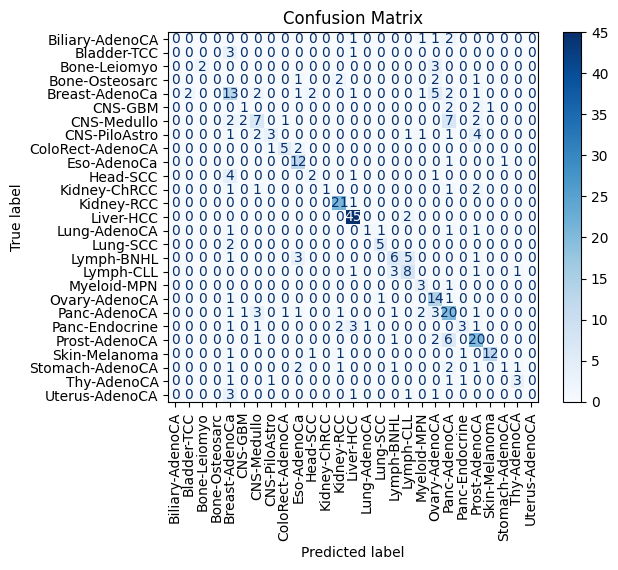

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)

disp.plot(cmap='Blues', xticks_rotation=90)

plt.title('Confusion Matrix')
plt.show()

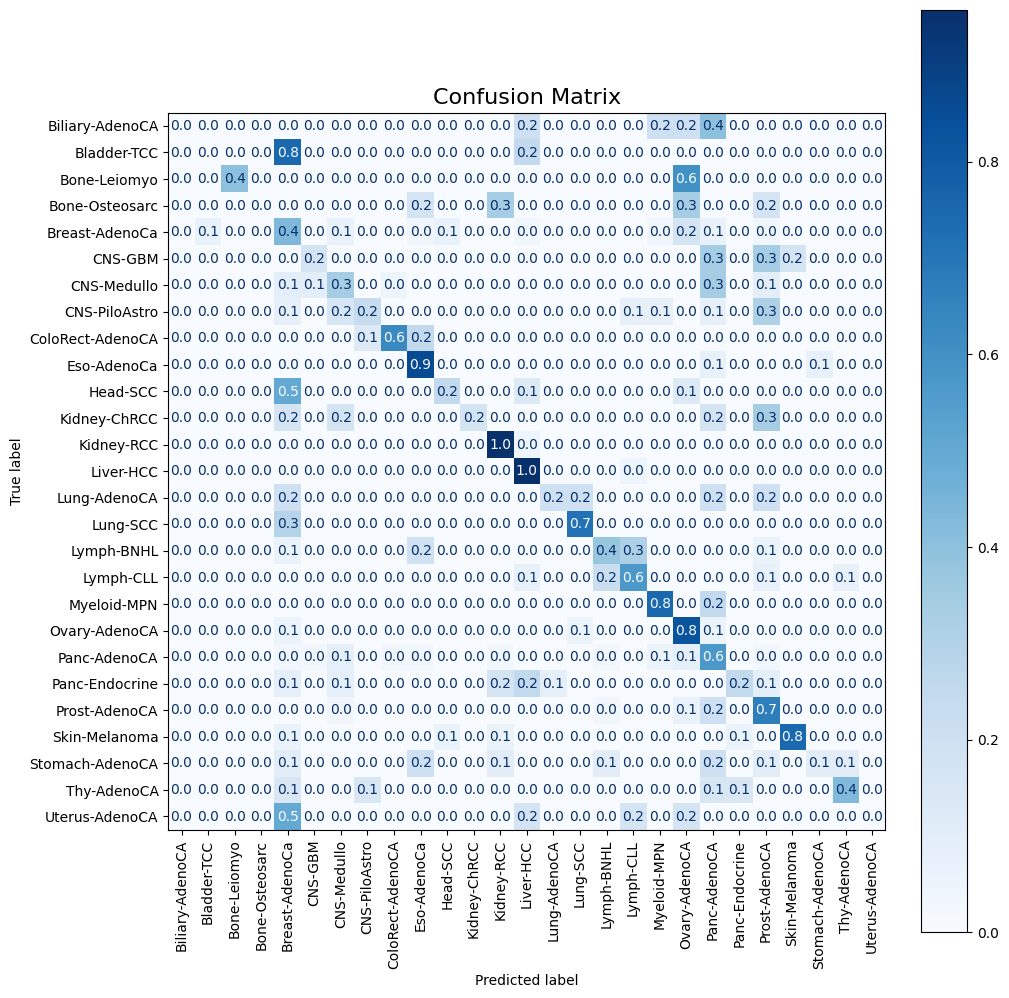

In [42]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

#im = disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)  

# Shrink the colorbar
#im.figure_.axes[-1].set_position([0.77, 0.1, 0.02, 0.4])

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"PCA_NormCounts_CM.pdf", bbox_inches='tight')

plt.show()

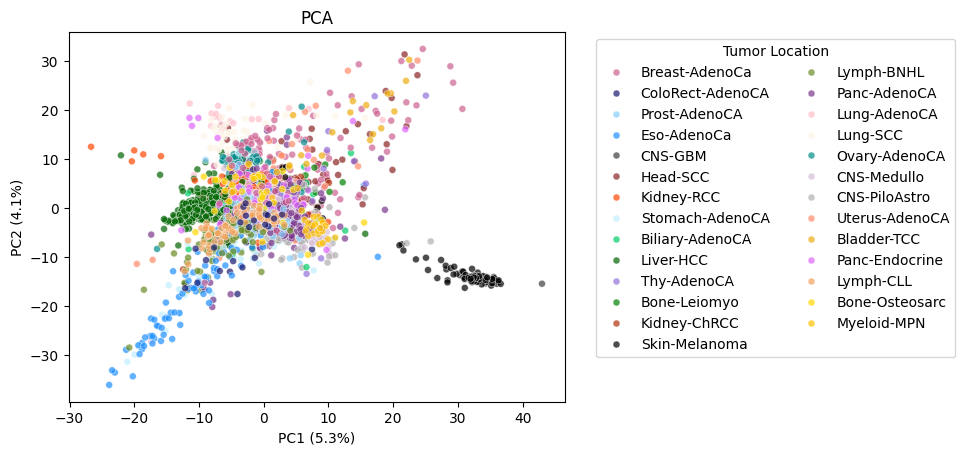

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

var_exp = pca.explained_variance_ratio_ * 100  # convert to percentage
pc1_label = f"PC1 ({var_exp[0]:.1f}%)"
pc2_label = f"PC2 ({var_exp[1]:.1f}%)"

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', hue='Tumor_Type', palette=palette, alpha=0.7, s=25)
plt.xlabel(pc1_label)
plt.ylabel(pc2_label)
plt.title('PCA')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.savefig(f"PC1_2.pdf", bbox_inches='tight')

plt.show()

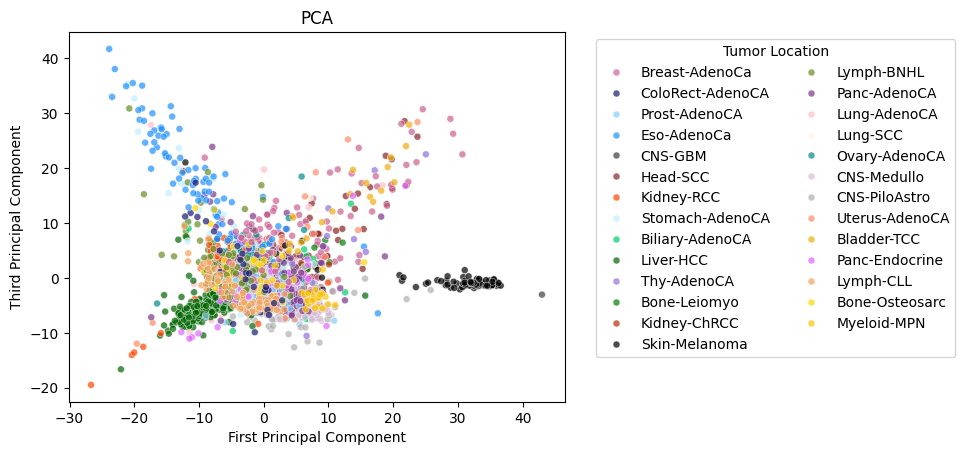

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC3', hue='Tumor_Type', palette=palette, alpha=0.7, s=25)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.savefig(f"PC1_3.pdf", bbox_inches='tight')

plt.show()

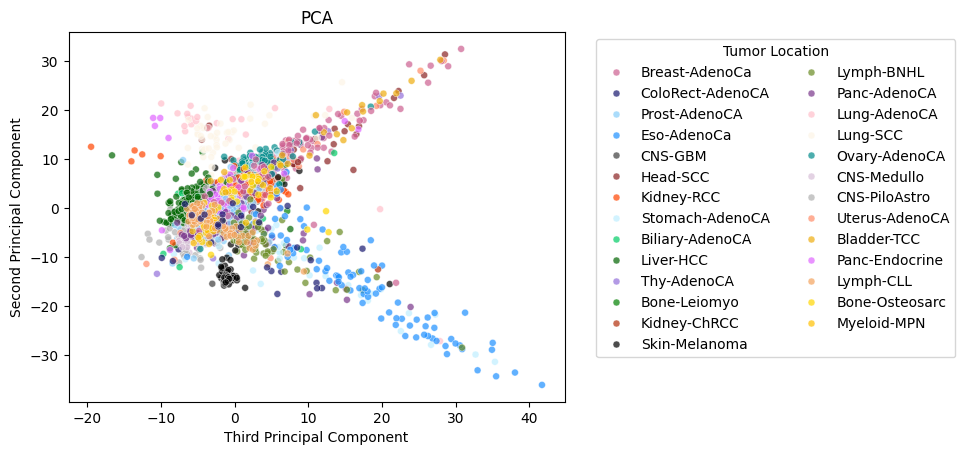

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

var_exp = pca.explained_variance_ratio_ * 100  # convert to percentage
pc3_label = f"PC3 ({var_exp[2]:.1f}%)"
pc2_label = f"PC2 ({var_exp[1]:.1f}%)"

sns.scatterplot(data=pca_result_df, x='PC3', y='PC2', hue='Tumor_Type', palette=palette, alpha=0.7, s=25)
plt.xlabel('Third Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.savefig(f"PC2_3.pdf", bbox_inches='tight')

plt.show()

# Raw counts

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(mutation_counts)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [42]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.53262879 0.18170164 0.10909528 0.04691698 0.03125436 0.01284899
 0.00900501 0.0052027  0.00498432 0.00413316]


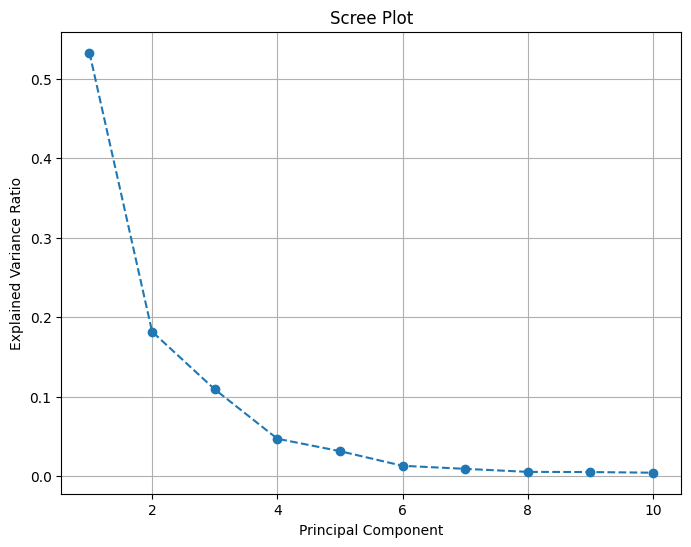

In [43]:
# Create a scree plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [44]:
pca_result_scaled[:2]

array([[-7.99192198, -5.15448608, -0.14951338, -0.45120508, -1.10471373,
        -0.4994704 ,  0.20175923, -0.04436216, -0.35514898, -0.04385054],
       [-3.53562351,  0.81400883, -1.81023942,  3.07486   ,  0.6044086 ,
         0.4865739 ,  0.50212672, -0.01238528,  0.54345975, -1.30184773]])

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [46]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.53262879 0.18170164 0.10909528 0.04691698 0.03125436]


In [47]:
# make df and combine by index
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [48]:
pca_result_df

,PC1,PC2,PC3,PC4,PC5
0,-7.991922,-5.154486,-0.149513,-0.451205,-1.104714
1,-3.535624,0.814009,-1.810239,3.074860,0.604409
2,-4.202538,-0.397332,-1.071596,1.862164,0.103779
3,-4.615769,-0.715664,-1.192708,1.527427,0.046185
4,1.964959,4.861087,-2.037945,1.223154,2.109015
...,...,...,...,...,...
2578,3.862237,2.403320,-1.888605,1.509203,1.695818
2579,4.321214,3.698009,-2.312580,1.019467,0.929929
2580,0.659692,-0.467600,-1.090453,-0.545845,0.062533
2581,253.272997,-104.451369,6.350314,15.197221,11.470620


In [49]:
# must make the series a df so I can preserve the order of "Tumor_Type", for some reason
tumor_type_df = tumor_type_map.to_frame(name="Tumor_Type").sort_index()
tumor_type_df

,Tumor_Type
Donor_ID,
DO1000,Breast-DCIS
DO1001,Breast-AdenoCa
DO1002,Breast-AdenoCa
DO1003,Breast-AdenoCa
DO1004,Breast-AdenoCa
...,...
DO9700,ColoRect-AdenoCA
DO9732,ColoRect-AdenoCA
DO9788,ColoRect-AdenoCA


In [50]:
tumor_type_df["Tumor_Type"]

Donor_ID
DO1000         Breast-DCIS
DO1001      Breast-AdenoCa
DO1002      Breast-AdenoCa
DO1003      Breast-AdenoCa
DO1004      Breast-AdenoCa
                ...       
DO9700    ColoRect-AdenoCA
DO9732    ColoRect-AdenoCA
DO9788    ColoRect-AdenoCA
DO9876    ColoRect-AdenoCA
DO9940    ColoRect-AdenoCA
Name: Tumor_Type, Length: 2583, dtype: object

In [51]:
pca_result_df["Tumor_Type"] = tumor_type_df["Tumor_Type"].values
pca_result_df

,PC1,PC2,PC3,PC4,PC5,Tumor_Type
0,-7.991922,-5.154486,-0.149513,-0.451205,-1.104714,Breast-DCIS
1,-3.535624,0.814009,-1.810239,3.074860,0.604409,Breast-AdenoCa
2,-4.202538,-0.397332,-1.071596,1.862164,0.103779,Breast-AdenoCa
3,-4.615769,-0.715664,-1.192708,1.527427,0.046185,Breast-AdenoCa
4,1.964959,4.861087,-2.037945,1.223154,2.109015,Breast-AdenoCa
...,...,...,...,...,...,...
2578,3.862237,2.403320,-1.888605,1.509203,1.695818,ColoRect-AdenoCA
2579,4.321214,3.698009,-2.312580,1.019467,0.929929,ColoRect-AdenoCA
2580,0.659692,-0.467600,-1.090453,-0.545845,0.062533,ColoRect-AdenoCA
2581,253.272997,-104.451369,6.350314,15.197221,11.470620,ColoRect-AdenoCA


In [52]:
# save for performance measure
pca_result_df.to_csv('PCs_raw.tsv', sep='\t', index=False)

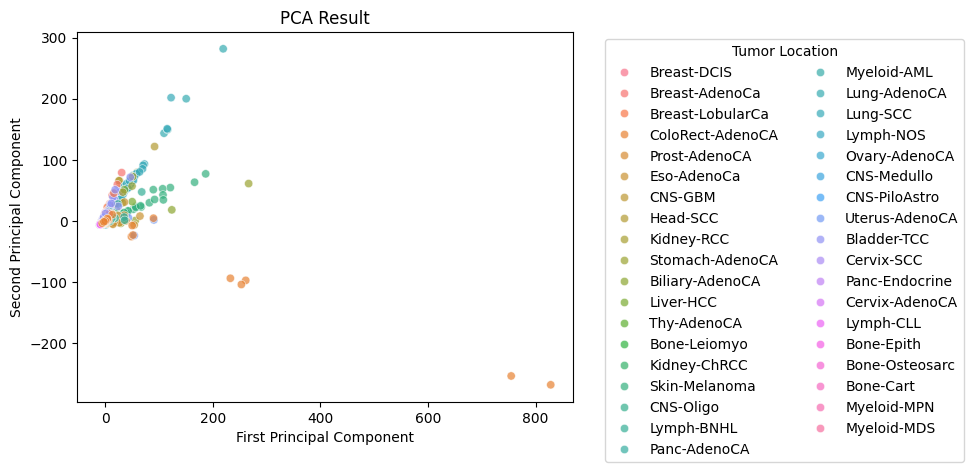

In [53]:
# looks even worse in terms of dispersion when the counts are normalized
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', hue='Tumor_Type', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

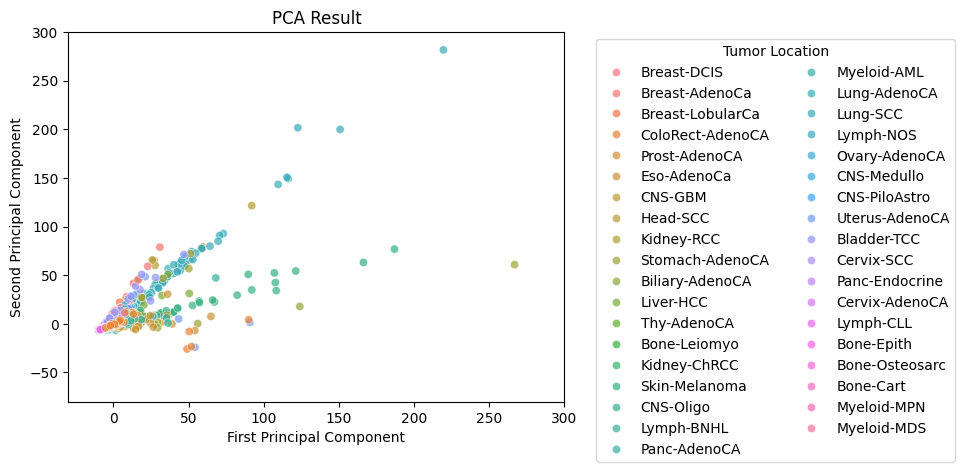

In [63]:
# zoom in on center cluster

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', hue='Tumor_Type', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-30, 300)
plt.ylim(-80, 300)

plt.show()

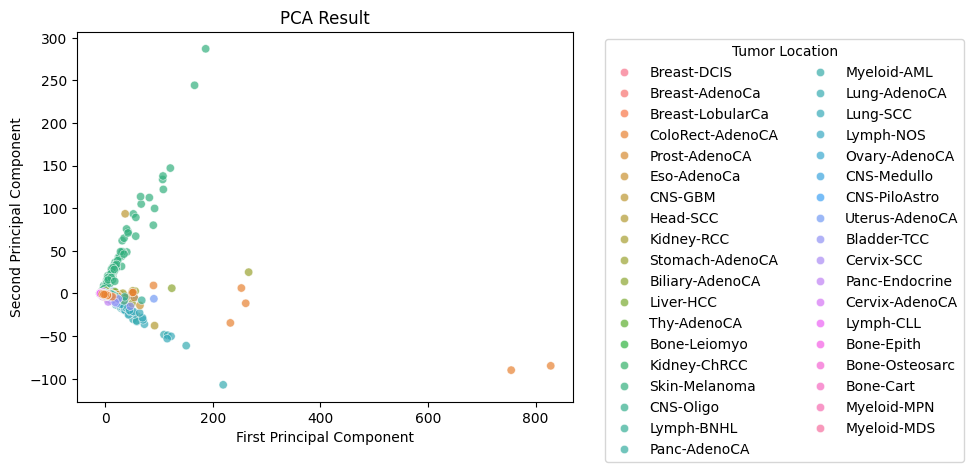

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC3', hue='Tumor_Type', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

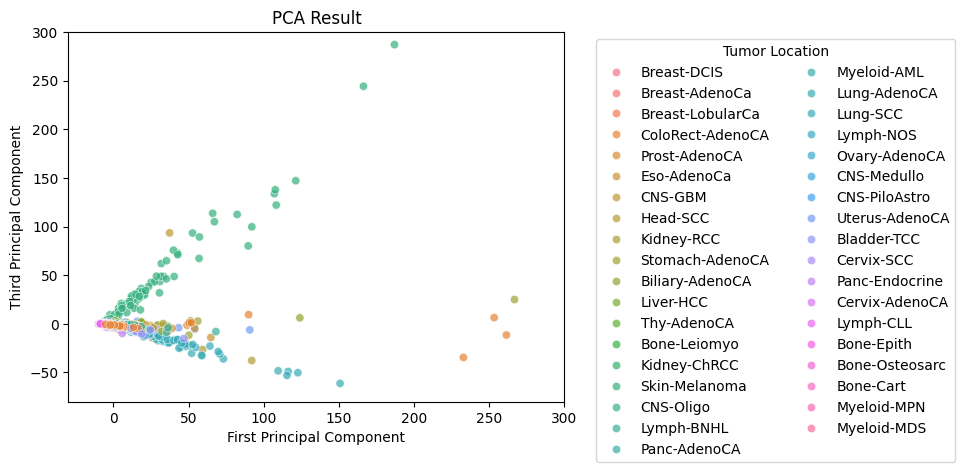

In [64]:
# zoom in on center cluster

sns.scatterplot(data=pca_result_df, x='PC1', y='PC3', hue='Tumor_Type', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-30, 300)
plt.ylim(-80, 300)

plt.show()

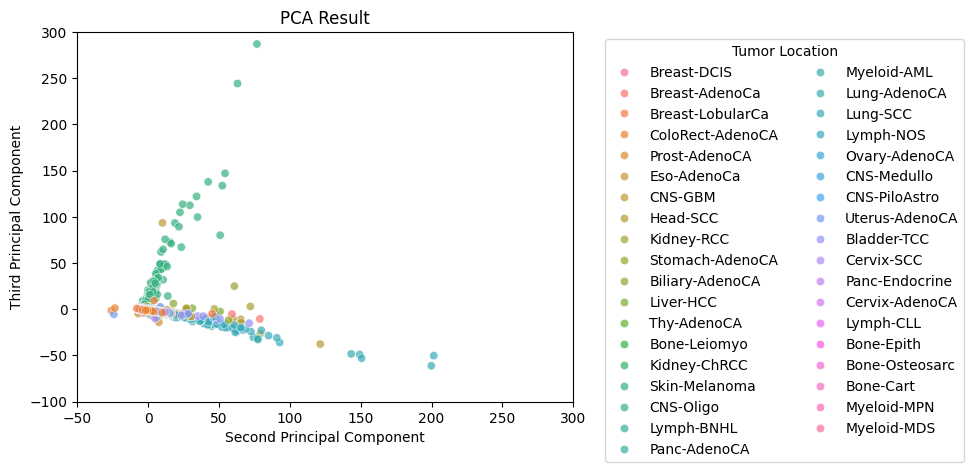

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC2', y='PC3', hue='Tumor_Type', alpha=0.7)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-50, 300)
plt.ylim(-100, 300)

plt.show()

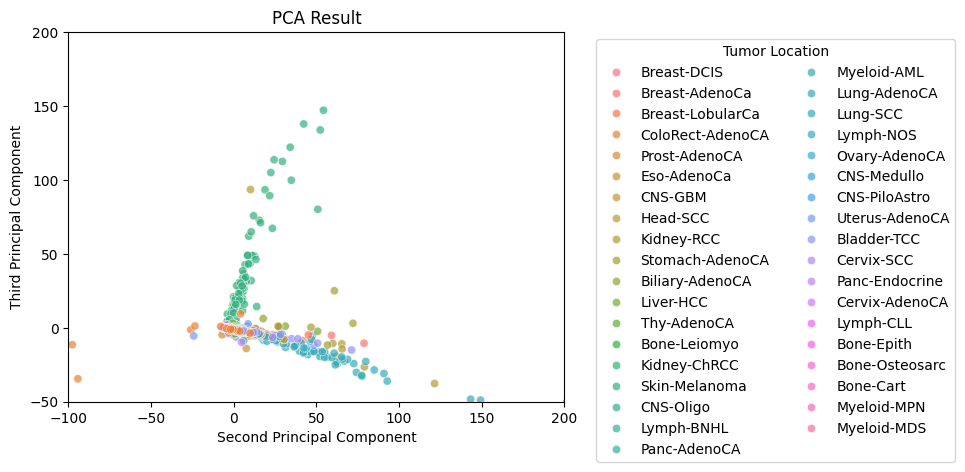

In [69]:
# zoom in on center cluster

sns.scatterplot(data=pca_result_df, x='PC2', y='PC3', hue='Tumor_Type', alpha=0.7)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA Result')
plt.legend(title='Tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.xlim(-100, 200)
plt.ylim(-50, 200)

plt.show()

## Counts per mutation context

In [5]:
1744/2583

0.6751838946960899

In [6]:
0.675*41318716

27890133.3

In [7]:
27890133/1536

18157.638671875

In [8]:
27890133/1536/1744

10.41149006414851

In [9]:
28000000/1536/1744

10.45250382262997

## Feature PCA

In [17]:
df_filtered = pd.read_parquet("to_dgd.parquet")

In [18]:
df_filtered

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,12,6,5,11,7,4,2,6,2,0,...,2,7,4,5,7,12,5,3,13,Breast-AdenoCa
DO1002,20,4,6,5,11,9,0,4,3,2,...,3,4,0,6,6,6,1,2,7,Breast-AdenoCa
DO1003,13,4,7,6,3,6,0,9,2,0,...,2,6,3,1,6,5,3,3,8,Breast-AdenoCa
DO1004,34,11,19,24,33,13,3,20,2,1,...,11,9,7,10,12,5,7,6,17,Breast-AdenoCa
DO1005,9,5,5,7,9,10,3,9,0,0,...,3,3,3,2,3,5,4,2,4,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,51,14,40,43,47,17,2,29,4,0,...,4,19,7,14,13,47,27,13,80,ColoRect-AdenoCA
DO9732,76,21,24,47,39,28,0,22,5,3,...,5,9,6,14,15,17,27,12,48,ColoRect-AdenoCA
DO9788,59,10,25,26,26,16,2,20,7,2,...,4,14,6,7,13,39,27,18,65,ColoRect-AdenoCA


In [20]:
# mutation frequencies for each sample
df_toPCA = df_filtered.iloc[:, :-1].div(df_filtered.iloc[:, :-1].sum(axis=1), axis=0)
df_toPCA

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.002122,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,...,0.000000,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299
DO1002,0.003684,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,...,0.000000,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289
DO1003,0.002779,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,...,0.000000,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710
DO1004,0.003077,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,...,0.000000,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538
DO1005,0.001401,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,...,0.000000,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,0.002921,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,...,0.000115,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581
DO9732,0.004553,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,...,0.000060,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876
DO9788,0.004425,0.000750,0.001875,0.001950,0.001950,0.001200,0.000150,0.001500,0.000525,0.000150,...,0.000075,0.000300,0.001050,0.000450,0.000525,0.000975,0.002925,0.002025,0.001350,0.004875


In [21]:
df_toPCA = df_toPCA.T

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_toPCA)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [24]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.46582063 0.0795406  0.0515986  0.03767757 0.03183029]


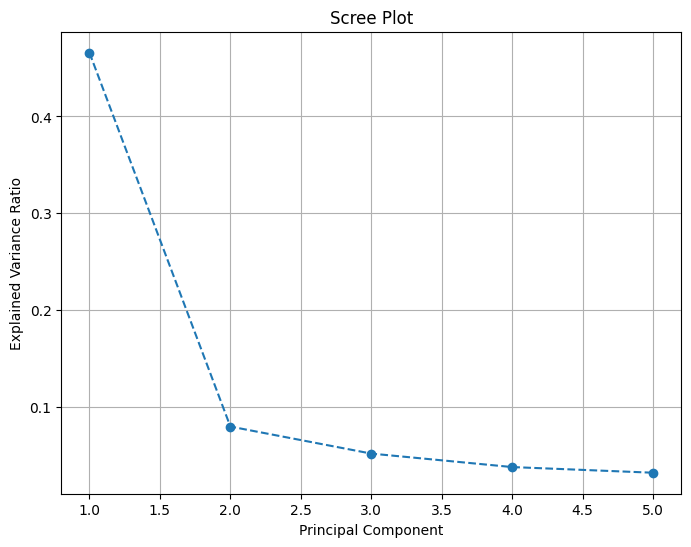

In [25]:
# Create a scree plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [26]:
# make df and combine by index
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [27]:
pca_result_df

,PC1,PC2,PC3,PC4,PC5
0,149.948656,-21.867938,-0.038924,-12.047601,-35.986176
1,18.944112,-10.090496,-2.390711,-3.860999,-12.276927
2,47.491837,-15.843781,-2.949259,-5.361283,-22.150705
3,67.075027,-18.146771,-0.106052,-4.797851,-23.780054
4,90.190181,-14.375903,-0.106628,-12.505591,-24.286665
...,...,...,...,...,...
1531,-2.379524,-2.944351,1.303590,1.482179,-3.375125
1532,40.751663,-11.136467,77.487921,73.490758,4.879073
1533,10.774402,-6.009692,45.810737,43.633028,3.224990
1534,3.318768,-3.029421,34.568449,31.807617,2.480479


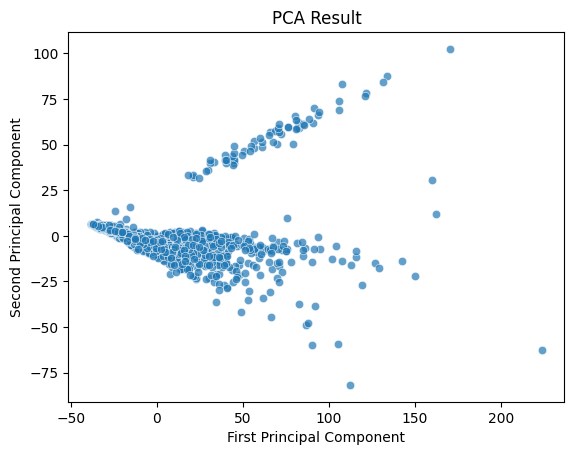

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_result_df, x='PC1', y='PC2', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.show()